In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


import time

In [2]:
data = pd.read_csv('Data/train.csv')
submission_data = pd.read_csv('Data/test.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [4]:
print("The shape of training dataset is", data.shape, "This includes a label column at index 0")
print("Whereas the shape of test dataset is", submission_data.shape)

The shape of training dataset is (42000, 785) This includes a label column at index 0
Whereas the shape of test dataset is (28000, 784)


In [5]:
disp_mat = np.matrix(data.iloc[:,1:])

In [6]:
def display (i):
  img = disp_mat[i].reshape(28,28)

  plt.imshow(img, cmap="gray")
  plt.title("The Label is {}".format(data.iloc[i,0]),fontsize=20)

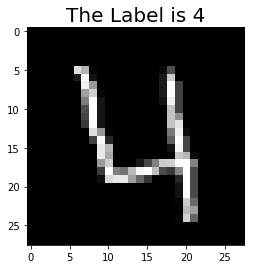

In [7]:
display(3)

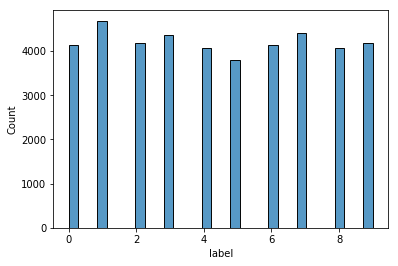

In [8]:
sns.histplot(data.iloc[:,0])
plt.show()

Distrubution of y labels have no skewness, which is a good thing<br>

In [9]:
#Turning labels into 10X1 form
col ='label'
col_types = list(set(data[col]))
print()
print("The list of unique values")
print(col_types)

dum_data_col = pd.get_dummies(data, columns=[col], prefix=[col+"_"] )

data = data.merge(dum_data_col)


The list of unique values
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [10]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f

import torch.utils.data as data_utils

In [12]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=(1/6), random_state=96, shuffle = True)
test_data,crossval_data = train_test_split(test_data, test_size=(1/2), random_state=96, shuffle = True)

In [13]:
print (train_data.shape, crossval_data.shape, test_data.shape)

(35000, 795) (3500, 795) (3500, 795)


In [14]:
#Creating the Model
#input_size = number of features
#output_size = number of classes for multiclassification

class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression,self).__init__()
        self.fc1 = nn.Linear(input_size, output_size)

    def forward(self, x):
        #x = self.fc1(x) #gives much better results somehow
        x = torch.sigmoid(self.fc1(x))
        return x



class NN1(nn.Module):
    def __init__(self, input_size, output_size, hidden_1, hidden_2):
        super(NN1,self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, output_size)
        
    def forward(self, x):
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class NN2(nn.Module):
    def __init__(self, input_size, output_size, hidden_1, hidden_2, hidden_3):
        super(NN2,self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, hidden_3)
        self.fc4 = nn.Linear(hidden_3, output_size)
        
    def forward(self, x):
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = f.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [15]:
#Set Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [16]:
#Hyperparameters
input_size = 28*28
output_size = 10
learning_rate = 0.001
batch_size = 128
num_epochs = 16

In [17]:
X_train = torch.tensor(train_data.drop(['label', 'label__0',	'label__1',	'label__2',	'label__3',	'label__4',	'label__5',	'label__6',	'label__7',	'label__8',	'label__9'], axis = 1).values.astype(np.float32))
y_train = torch.tensor(train_data[['label__0',	'label__1',	'label__2',	'label__3',	'label__4',	'label__5',	'label__6',	'label__7',	'label__8',	'label__9']].values.astype(np.float32))

X_cv = torch.tensor(crossval_data.drop(['label', 'label__0',	'label__1',	'label__2',	'label__3',	'label__4',	'label__5',	'label__6',	'label__7',	'label__8',	'label__9'], axis = 1).values.astype(np.float32))
y_cv = torch.tensor(crossval_data[['label__0',	'label__1',	'label__2',	'label__3',	'label__4',	'label__5',	'label__6',	'label__7',	'label__8',	'label__9']].values.astype(np.float32))

X_test = torch.tensor(test_data.drop(['label', 'label__0',	'label__1',	'label__2',	'label__3',	'label__4',	'label__5',	'label__6',	'label__7',	'label__8',	'label__9'], axis = 1).values.astype(np.float32))
y_test = torch.tensor(test_data[['label__0',	'label__1',	'label__2',	'label__3',	'label__4',	'label__5',	'label__6',	'label__7',	'label__8',	'label__9']].values.astype(np.float32))

In [18]:
train_tensor = data_utils.TensorDataset(X_train, y_train) 
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = True)

cv_tensor = data_utils.TensorDataset(X_cv, y_cv) 
cv_loader = data_utils.DataLoader(dataset = cv_tensor, batch_size = X_cv.size()[0], shuffle = True)

test_tensor = data_utils.TensorDataset(X_test, y_test) 
test_loader = data_utils.DataLoader(dataset = test_tensor, batch_size = X_test.size()[0],  shuffle = False)

In [19]:
model_LogReg = LogisticRegression(input_size=input_size, output_size=output_size).to(device)
model_3B1B = NN1(input_size=input_size, output_size=output_size, hidden_1 = 16, hidden_2 = 16).to(device)
model_100_50 = NN1(input_size=input_size, output_size=output_size, hidden_1 = 100, hidden_2 = 50).to(device)
model_512_256_64 = NN2(input_size=input_size, output_size=output_size, hidden_1 = 512, hidden_2 = 256, hidden_3 = 64).to(device)

In [20]:
optimizer_LogReg = optim.Adam(model_LogReg.parameters(), lr = learning_rate)
optimizer_3B1B   = optim.Adam(model_3B1B.parameters(), lr = learning_rate)
optimizer_100_50 = optim.Adam(model_100_50.parameters(), lr = learning_rate)
optimizer_512_256_64 = optim.Adam(model_512_256_64.parameters(), lr = learning_rate)

In [21]:
models = [('Logistic Regression', model_LogReg, optimizer_LogReg),
          ('3B1B Neural Network', model_3B1B, optimizer_3B1B),
          ('100,50 Width Neural Network', model_100_50, optimizer_100_50),
          ('512,256,64 Width Neural Network', model_512_256_64, optimizer_512_256_64)]

In [22]:
criterion = nn.CrossEntropyLoss()

In [23]:
print(y_cv.size()[0]) 

3500


In [24]:
def check_accuracy(loader, model, update = False):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for X,y in loader:
            X = X.to(device = device)
            y = y.to(device = device)

            y_pred = model(X)
            _, pred = y_pred.max(1)
            _, label = y.max(1)
            
            num_correct += (pred == label).sum()
            num_samples += pred.size(0)
      
        acc = num_correct/num_samples

        if update == True:
            print(f'Got {num_correct}/{num_samples} with accuracy {acc:.2f}')
      
        return acc

In [25]:
Y_TEST_PRED = []

In [26]:
for model_name, model, optimizer in models:
    
    start_time = time.perf_counter()
    tot_time = 0
    for epoch in range(num_epochs):
        
        tot_time += time.perf_counter()
        if (epoch%2 == 0):
            
            
            train_acc = check_accuracy(train_loader, model)
            cv_acc = check_accuracy(cv_loader, model)
            print(f'Model:{model_name} ',f' Epoch:{epoch} ',f' Training Accuracy:{train_acc:.2f} ',f' Cross Validation Accuracy:{cv_acc:.2f}')
        tot_time -= time.perf_counter()
        
        for batch_index, (pixels, labels) in enumerate(train_loader):

            pixels = pixels.to(device = device)
            labels = labels.to(device = device)

            #forward
            predictions = model(pixels)
            #print(predictions.size(),labels.size())

            loss = criterion(predictions, labels)

            #backward
            optimizer.zero_grad()

            loss.backward()

            #gradient descent
            optimizer.step()
            
    tot_time += time.perf_counter() - start_time
    
    for X,y in test_loader:
        X = X.to(device = device)
        y = y.to(device = device)

        y_test_pred = model(X)
        y_test_pred = y_test_pred.detach().numpy()
    predict_class = np.argmax(y_test_pred, axis=1)
    predict_class = predict_class.tolist()
    
    Y_TEST_PRED.append((model_name, predict_class, tot_time))
    print()

Model:Logistic Regression   Epoch:0   Training Accuracy:0.11   Cross Validation Accuracy:0.11
Model:Logistic Regression   Epoch:2   Training Accuracy:0.54   Cross Validation Accuracy:0.54
Model:Logistic Regression   Epoch:4   Training Accuracy:0.53   Cross Validation Accuracy:0.54
Model:Logistic Regression   Epoch:6   Training Accuracy:0.52   Cross Validation Accuracy:0.53
Model:Logistic Regression   Epoch:8   Training Accuracy:0.45   Cross Validation Accuracy:0.46
Model:Logistic Regression   Epoch:10   Training Accuracy:0.53   Cross Validation Accuracy:0.53
Model:Logistic Regression   Epoch:12   Training Accuracy:0.53   Cross Validation Accuracy:0.53
Model:Logistic Regression   Epoch:14   Training Accuracy:0.54   Cross Validation Accuracy:0.54

Model:3B1B Neural Network   Epoch:0   Training Accuracy:0.09   Cross Validation Accuracy:0.08
Model:3B1B Neural Network   Epoch:2   Training Accuracy:0.85   Cross Validation Accuracy:0.84
Model:3B1B Neural Network   Epoch:4   Training Accuracy:

In [27]:
y_test_true = y_test.detach().numpy()
y_test_true = np.argmax(y_test_true, axis=1)
y_test_true = y_test_true.tolist()

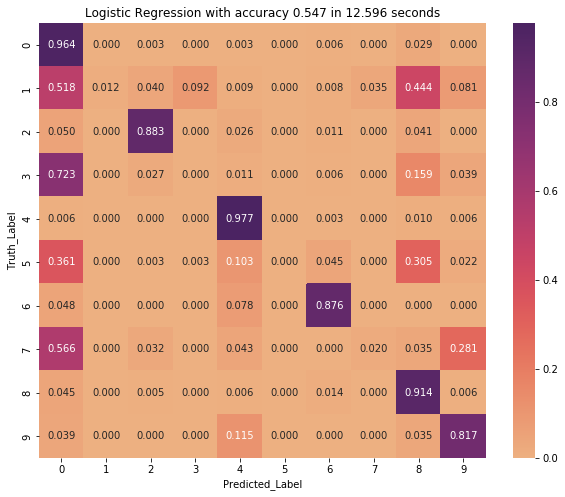

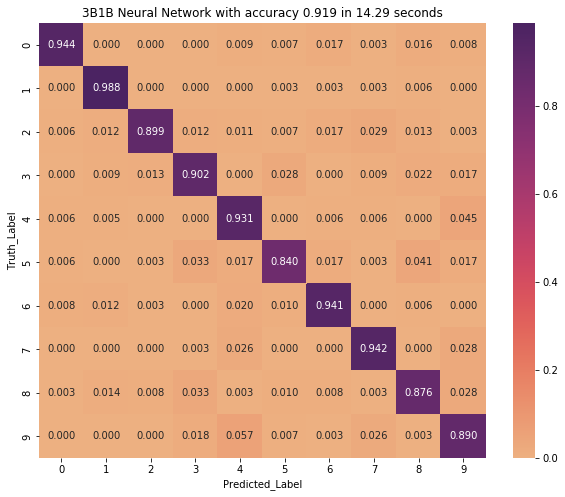

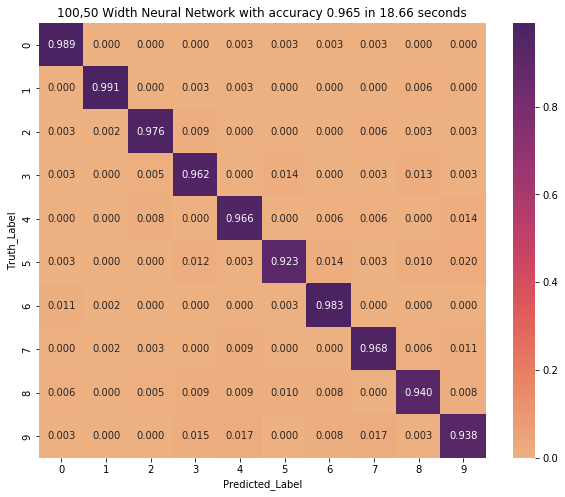

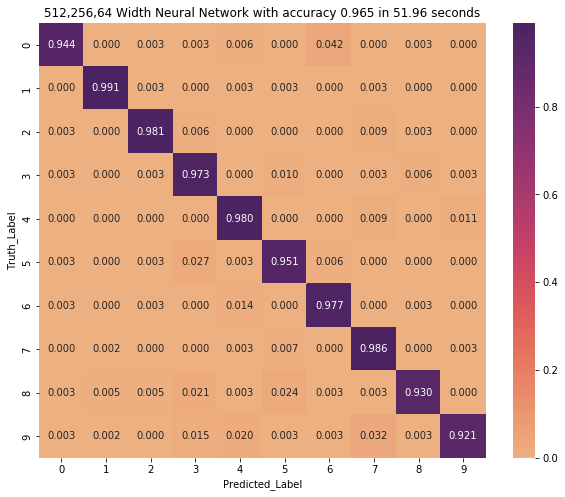

In [28]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

for (model_name, y_test_pred, ttime) in Y_TEST_PRED:
    
    confusion_matrix = metrics.confusion_matrix(y_test_true, y_test_pred)
    confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)
    
    acc = sum(1 for x,y in zip(y_test_true, y_test_pred) if x == y) / float(len(y_test_true))
    acc = round(acc,3)
    ttime = round(ttime,3)
    
    plt.figure(figsize = (10,8))
    sns.heatmap(confusion_matrix, annot=True, cmap= 'flare',fmt='.3f' , cbar=True)
    plt.xlabel('Predicted_Label')
    plt.ylabel('Truth_Label')
    
    title = model_name + " with accuracy " + str(acc) + " in " + str(ttime) + " seconds"
    plt.title(title)
    
    plt.show()